In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("weight-height.csv")

In [4]:
df.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

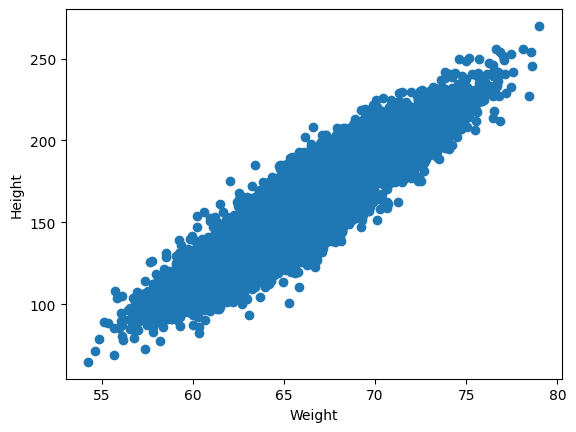

In [6]:
#scatter
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [7]:
# Corelation
df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


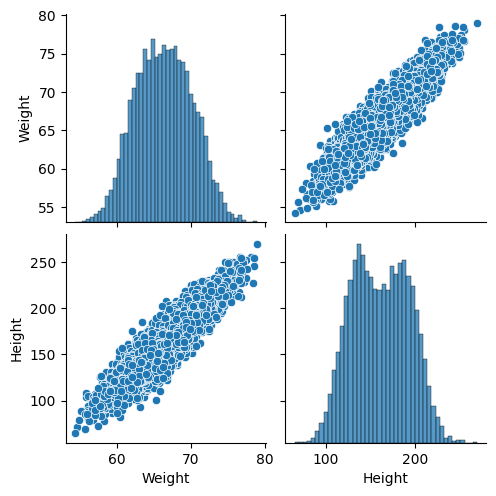

In [8]:
# Seaborn for visualization
import seaborn as sns
sns.pairplot(df);

## Creating Independent and Dependent features

In [9]:
# independent features should be either dataframe or 2-dimensional array 
# that is why we used [[]]
X=df[['Weight']] # dataframe
X

,Weight
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [10]:
np.array(X) ## 2-D array

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [11]:
np.shape(X) # the shape should be in rows and coulmn format(10000,1) or else it cause error

(10000, 1)

In [12]:
# dependent features
y=df['Height'] # it should be in series or 1- D that is why we used []
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Height, Length: 10000, dtype: float64

In [13]:
np.array(y).shape # it should be in row format (10000,) or it causes error while model building

(10000,)

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

In [16]:
X_train.shape
# this should be 2-D

(8000, 1)

In [17]:
y_test.shape
# this should be 1-D

(2000,)

## Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

### Standardization means we are testing Z-score of the train and test dataset
  Z=(Xi-mean)/(std)
we use "fit_transform" for train data(that is we are applying Z-score formula) 
fit_transform calculates the mean and std of the and transform it into according to the Z-score"train data"
But              
we use "transform" for test data(applying Z-score) but since we are using "transform" it takes the mean and std of the "train data"(very very imp)



main reson for using "fit_transform" for training and "transform" for test is to avoid data leakage(test data should not come to know about train data and model should take the test data as separate)


In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.transform(X_test)

In [21]:
X_train

array([[-1.29189724],
       [ 2.16821663],
       [ 0.5586044 ],
       ...,
       [-0.52899659],
       [ 0.70596411],
       [ 0.31963251]])

In [22]:
X_test

array([[ 0.60526038],
       [ 0.64221273],
       [ 0.00999782],
       ...,
       [-1.08456878],
       [ 0.18427147],
       [-2.00933246]])

## Applying Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regression=LinearRegression(n_jobs=-1)

In [25]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [26]:
print("Coefficient or Slope:",regression.coef_)
print("Intercept:",regression.intercept_)
# this is beta 1 (coefficient) and value in the equation
# beta0(intercept)
#y=b0+b1x

Coefficient or Slope: [29.61903439]
Intercept: 161.3267623136662


## Plotting Best Fit line for the training data

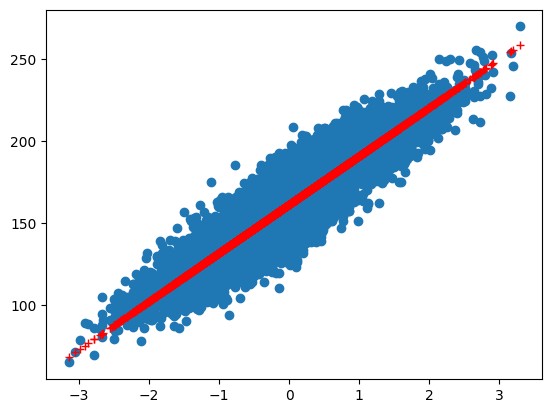

In [40]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r+");

the above best fit line has the      
Coefficient or Slope: 29.61903439     
Intercept: 161.3267623136662 

### Prediction of test data
predicted height output = intercept +coef_(Weights)                    
y_pred_test = 161.3267 +  29.6190(X_test)

In [28]:
## Prediction  for test
y_pred=regression.predict(X_test)
y_pred

array([179.25399045, 180.34848319, 161.62288803, ..., 129.20288227,
       166.7847052 , 101.81227501])

## Performance Metrices

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

149.00350423612707
9.691933803922717
12.206699153994379


## R-squared formula
R_squared = 1 - (SS_res / SS_tot)

## Adjusted R-squared formula
Adjusted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - p - 1))delmodel
mod

1. SS_res: Residual Sum of Squares (sum of squared differences between actual and predicted values)

2. SS_tot: Total Sum of Squares (sum of squared differences between actual values and their mean)

3. n: Number of observations

4. p: Number of predictors (independent variables) in the model

In [31]:
from sklearn.metrics import r2_score

In [32]:
score=r2_score(y_test,y_pred)
print(score)

0.8577317776680295


In [33]:
adjusted_r_square= 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r_square

0.8576605723515471

## OLS Linear Regression

In [34]:
import statsmodels.api as sm

In [35]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
prediction

array([ 17.92722813,  19.02172088,   0.29612572, ..., -32.12388004,
         5.45794289, -59.5144873 ])

In [36]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              268.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):                    2.71e-59
Time:                        12:49:19   Log-Likelihood:                         -52042.
No. Observations:                8000   AIC:                                  1.041e+05
Df Residuals:                    7999   BIC:                                  1.041e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Prediction

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
regression.predict(scaler.transform([[65]]))

array([150.85424375])

## the above output says that if the person has 65 kg weight then his height would be 150 cm